In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [7]:
# Load the dataset (Make sure "data1.csv" is in the same directory)
data1 = pd.read_csv("data1.csv")

# Display first few rows
print(data1.head())


        Name  NO₂ (µg/m³)  O₃ (µg/m³) Pollution Category
0  Ghaziabad     0.352081  256.423698     4 - Borderline
1  Ghaziabad     0.346645  238.518782     4 - Borderline
2  Ghaziabad     0.337710  290.520284     4 - Borderline
3  Ghaziabad     0.394439  292.273187     4 - Borderline
4  Ghaziabad     0.333927  289.085719     4 - Borderline


In [8]:
# Drop 'Name' column since it's not useful for training
data1.drop("Name", axis=1, inplace=True)

# Encode 'Pollution Category' into numerical values
encoder = LabelEncoder()
data1["Pollution Category"] = encoder.fit_transform(data1["Pollution Category"])

# Normalize NO₂ and O₃ values
scaler = MinMaxScaler()
data1[["NO₂ (µg/m³)", "O₃ (µg/m³)"]] = scaler.fit_transform(data1[["NO₂ (µg/m³)", "O₃ (µg/m³)"]])

# Display processed data
print(data1.head())


   NO₂ (µg/m³)  O₃ (µg/m³)  Pollution Category
0     0.135643    0.145044                   3
1     0.133549    0.084402                   3
2     0.130106    0.260527                   3
3     0.151962    0.266464                   3
4     0.128649    0.255669                   3


In [9]:
# Split into features (X) and labels (y)
X = data1[["NO₂ (µg/m³)", "O₃ (µg/m³)"]].values
y = tf.keras.utils.to_categorical(data1["Pollution Category"])  # Convert to one-hot encoding

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 11692, Testing samples: 2924


In [10]:
# Build the MLP Model
model = Sequential([
    Dense(16, activation="relu", input_shape=(2,)),  # Input layer with 2 features
    Dense(8, activation="relu"),  # Hidden layer
    Dense(y.shape[1], activation="softmax")  # Output layer (multi-class classification)
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Show model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
Total params: 238 (952.00 Byte)
Trainable params: 238 (952.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
366/366 [==============================] - 2s 2ms/step - loss: 1.5393 - accuracy: 0.3751 - val_loss: 1.3673 - val_accuracy: 0.3919
Epoch 2/50
366/366 [==============================] - 0s 1ms/step - loss: 1.1684 - accuracy: 0.4702 - val_loss: 0.9757 - val_accuracy: 0.5667
Epoch 3/50
366/366 [==============================] - 0s 1ms/step - loss: 0.8414 - accuracy: 0.6814 - val_loss: 0.7158 - val_accuracy: 0.8037
Epoch 4/50
366/366 [==============================] - 1s 2ms/step - loss: 0.6389 - accuracy: 0.8174 - val_loss: 0.5577 - val_accuracy: 0.8307
Epoch 5/50
366/366 [==============================] - 0s 1ms/step - loss: 0.5139 - accuracy: 0.8467 - val_loss: 0.4602 - val_accuracy: 0.8529
Epoch 6/50
366/366 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.8682 - val_loss: 0.3970 - val_accuracy: 0.8718
Epoch 7/50
366/366 [==============================] - 0s 1ms/step - loss: 0.3772 - accuracy: 0.8874 - val_loss: 0.3491 - val_accuracy: 0.8912
Epoch 

In [12]:
# Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


92/92 [==============================] - 0s 919us/step - loss: 0.0971 - accuracy: 0.9706
Test Accuracy: 0.9706


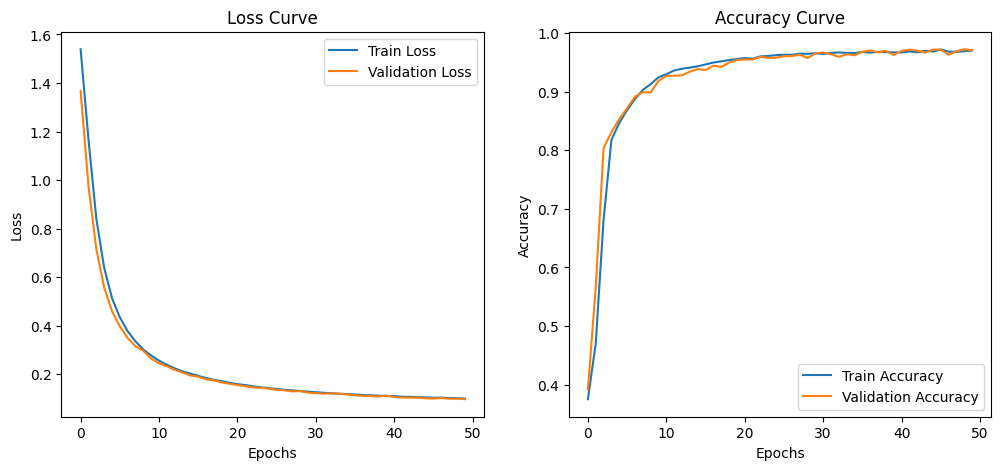

In [13]:
import matplotlib.pyplot as plt

# Plot training loss & accuracy
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()


In [15]:
# Save the entire model
model.save("mlp1.keras")
print("done")

done
